Mahdi Ahmadi
Blatt_1 Data Science
teil 1 
Schritt 1_2


In [15]:
import requests
import bs4
import pandas as pd
import numpy as np
from datetime import datetime




url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url,headers=headers)
print(response)
if response.status_code == 200:
    page_content = response.text#Name ändern, um den Inhalt der Seite zu speichern
    soup = bs4.BeautifulSoup(page_content, 'html.parser')# html inhlat paresen(duchgehen)

    table = soup.find('table', {'class': 'table table-striped'})# tabllen finden
    if table:
        df = pd.read_html(str(table))[0]#html datei einlesen
        df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'film'] # spalten umbenennen     
        df = df.drop(columns = ['film'])
        #kombi datum und zeit in 3 datetime spalten 
        for index, row in df.iterrows():
            date_str = row ['date']#extrahierung von Daten
            start_time_str = row ['start_time']
            max_time_str = row ['max_time']
            end_time_str = row ['end_time']

            #kombinieren Datum und  Zeit
            start_datetime = datetime.strptime(f"{date_str} {start_time_str}", "%Y/%m/%d %H:%M") #Y=Jahr, m=Monat, d=Tag, H=Stunde, M=Minute
            max_datetime = datetime.strptime(f"{date_str} {max_time_str}", "%Y/%m/%d %H:%M")
            end_datetime = datetime.strptime(f"{date_str} {end_time_str}", "%Y/%m/%d %H:%M")

            #aktualisieren der Daten
            df.at[index, 'start_datetime'] = start_datetime#df.at = elemente in einem DataFrame abrufen,ersetzen
            df.at[index, 'max_datetime'] = max_datetime
            df.at[index, 'end_datetime'] = end_datetime
            
            # Lösche die alten Spalten
        df_weather = df.drop(columns = ['date', 'start_time', 'max_time', 'end_time'])

        #Regionen mit - = NaN
        df_weather['region'] = df_weather['region'].replace('-', np.nan)
        #Deimension des DataFrames
        print(f"Dimension: {df_weather.shape[0]} × {df_weather.shape[1]}")

        print(df_weather.head(50))
    else:
        print ("Tablle nicht gefunden")
else :
    print ("Seite nicht gefunden")
 





<Response [200]>
Dimension: 50 × 6
    rank  x_class  region      start_datetime        max_datetime  \
0      1     X40+     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1      2  X28.57+    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2      3  X24.57+     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
3      4  X24.42+     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
4      5  X20.67+    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   
5      6   X14.36     486 2003-10-29 20:37:00 2003-10-29 20:49:00   
6      7   X13.37    2673 2017-09-06 11:53:00 2017-09-06 12:02:00   
7      8   X12.97    8100 1997-11-06 11:49:00 1997-11-06 11:55:00   
8      9   X12.95     930 2006-12-05 10:18:00 2006-12-05 10:35:00   
9     10   X11.96     486 2003-11-02 17:03:00 2003-11-02 17:25:00   
10    11   X11.88    2673 2017-09-10 15:35:00 2017-09-10 16:06:00   
11    12   X10.18     720 2005-01-20 06:36:00 2005-01-20 07:01:00   
12    13    X9.96    1263 2011-08-09 07:48:00 2011-08-09 08:05:00   

C:\Users\mahdi\AppData\Local\Temp\ipykernel_12588\1945083074.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]#html datei einlesen


Teil 1 Schritt 3 

In [16]:

# URL der Webseite
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)
print(response)

if response.status_code == 200:
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    
    # Extrahiere den Inhalt des <pre>-Tags
    pre_tag = soup.find('pre')#tabelle faegt mit per tag an
    
    if pre_tag:
        # Extrahiere den Text aus dem <pre>-Tag
        pre_text = pre_tag.text

        # Splitte den Text in Zeilen
        lines = pre_text.split('\n')
 
        # Initialisiere eine leere Liste, um die Daten zu speichern
        data = []
        
        # Überspringe die ersten Zeilen, die keine Daten enthalten
        for line in lines[5:]:
            if line.strip() == "=================================================================================================":
                continue #strip entfernt leerzeichen
            if line.strip() == "":
                continue

            # split String in einzelne Elemente,lerrzeichen als Trennzeichen
            columns = line.split()
            
            # len = Anzahl der Elemente
            if len(columns) == 15:
                data.append(columns)#append elemente hinzufuegen
        
        columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency',
                   'solar_source_location', 'noaa_active_region', 'soft_xray_flare_importance', 'cme_date',
                   'cme_time', 'central_position_angle', 'cme_width', 'cme_speed', 'phtx_link']
        
        # DataFrame data im Spalten zuordnen
        df = pd.DataFrame(data, columns=columns)
        
        # Zeige die Dimensionen des DataFrames an
        print(f"Dimension: {df.shape[0]} x {df.shape[1]}")#f string im {}zusammenfassen
        # shape = dimensionen als tuple [0] = zeilen [1] = spalten
        df = df.drop(index=0).reset_index(drop=True)#index 0 löschen
        # Anzeigeeinstellungen anpassen
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.max_colwidth', None)
        print(df)
    else:
        print("Pre-Tag nicht gefunden")
else:
    print("Fehler beim Request")

<Response [200]>
Dimension: 527 x 15
     start_date start_time end_date end_time start_frequency end_frequency  \
0    1997/01/20      08:56    01/20    09:02           14000         12000   
1    1997/04/01      14:00    04/01    14:15            8000          4000   
2    1997/04/07      14:30    04/07    17:30           11000          1000   
3    1997/05/12      05:15    05/14    16:00           12000            80   
4    1997/05/21      20:20    05/21    22:00            5000           500   
5    1997/09/23      21:53    09/23    22:16            6000          2000   
6    1997/11/03      05:15    11/03    12:00           14000           250   
7    1997/11/03      10:30    11/03    11:30           14000          5000   
8    1997/11/04      06:00    11/05    04:30           14000           100   
9    1997/11/06      12:20    11/07    08:30           14000           100   
10   1997/11/27      13:30    11/27    14:00           14000          7000   
11   1997/12/12      22:45 

Teil 1, Schritt 4
Daten bereinigen


In [17]:
from datetime import timedelta
#cme datee erhalten start date
        
#--/-- = Platzhalter für fehlende datum und --:-- = Platzhalter für fehlende Zeit
missing_values = ["--", "----", "Halo", "------", "-----", "----", "----", "----", "----"]
df.replace(missing_values, np.nan, inplace=True)# inplace = true ersetzt im orginal daten;false = erstellt eine kopie

#is_halo = neue Spalte; wenn central_position_angle = Halo dann True sonst False
df['is_halo'] = df['central_position_angle'].apply(lambda x: True if x == "Halo" else False)
df['central_position_angle'] = df['central_position_angle'].replace("Halo", np.nan)#ersetzt Halo durch NaN

#insistance(x = objrct , klasse)prüft ob x von klasse ist
df['width_lower_bound'] = df['cme_width'].apply(lambda x: True if isinstance(x, str) and ">" in x else False)
df['cme_width'] = df['cme_width'].apply(lambda x: x.replace(">", "") if isinstance(x, str) else x)#entfernen > von String

# Ersetzen von '24:00' durch '00:00'
df['start_time'] = df['start_time'].replace('24:00', '00:00')
df['end_time'] = df['end_time'].replace('24:00', '00:00')
#print(df)
#to_datetime = konvert time,date in datetime
# Konvertieren der Datums- und Zeitstrings in datetime-Objekte
df['start_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['start_time'], errors='coerce')
df['end_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['end_time'], errors='coerce')


#im df gabt keine jahr ,und error = coerce
df['cme_date'] = df['start_date'] 
df['cme_datetime'] = pd.to_datetime(df['cme_date'] + ' ' + df['cme_time'], errors='coerce')

#drop = löschen von spalten
df.drop(columns=['start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time'], inplace=True)

#spalten am anfang vorrücken, col for col in df: eine for schleife die alle spalten durchgeht if col not in filtert die spalten
cols = ['start_datetime', 'end_datetime', 'cme_datetime'] + [col for col in df if col not in ['start_datetime', 'end_datetime', 'cme_datetime']]
df = df[cols]
df_nasa = df

# Anzeigeeinstellungen anpassen
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


        # Ergebnis anzeigen
print(df_nasa)


         start_datetime        end_datetime        cme_datetime  \
0   1997-01-20 08:56:00 1997-01-20 09:02:00 1997-01-20 09:31:00   
1   1997-04-01 14:00:00 1997-04-01 14:15:00 1997-04-01 15:18:00   
2   1997-04-07 14:30:00 1997-04-07 17:30:00 1997-04-07 14:27:00   
3   1997-05-12 05:15:00 1997-05-12 16:00:00 1997-05-12 05:30:00   
4   1997-05-21 20:20:00 1997-05-21 22:00:00 1997-05-21 21:00:00   
5   1997-09-23 21:53:00 1997-09-23 22:16:00 1997-09-23 22:02:00   
6   1997-11-03 05:15:00 1997-11-03 12:00:00 1997-11-03 05:28:00   
7   1997-11-03 10:30:00 1997-11-03 11:30:00 1997-11-03 11:11:00   
8   1997-11-04 06:00:00 1997-11-04 04:30:00 1997-11-04 06:10:00   
9   1997-11-06 12:20:00 1997-11-06 08:30:00 1997-11-06 12:10:00   
10  1997-11-27 13:30:00 1997-11-27 14:00:00 1997-11-27 13:56:00   
11  1997-12-12 22:45:00 1997-12-12 23:20:00 1997-12-12 00:26:00   
12  1998-01-25 15:03:00 1998-01-25 15:18:00 1998-01-25 15:26:00   
13  1998-03-29 03:40:00 1998-03-29 03:52:00 1998-03-29 03:48:0

Teil 2 Frage 1

In [18]:
import pandas as pd

df_top_50 = df_nasa
# Function to clean and convert soft_xray_flare_importance to numeric
def clean_xray_importance(value):
    if isinstance(value, str):
        # Remove 'X' prefix and any non-numeric characters
        value = value.strip('X').replace('(', '').replace(')', '')
    try:
        return float(value)
    except ValueError:
        return None

# Apply the cleaning function to the column
df_top_50['soft_xray_flare_importance_numeric'] = df_top_50['soft_xray_flare_importance'].apply(clean_xray_importance)

# Drop rows where conversion failed 
df_top_50 = df_top_50.dropna(subset=['soft_xray_flare_importance_numeric'])

# Sicherstellen, dass beide 'start_datetime'-Spalten den gleichen Datentyp haben
df_nasa['start_datetime'] = pd.to_datetime(df_nasa['start_datetime'])


# Sort df_top_50 by the numeric column in descending order
df_top_50_sorted = df_top_50.sort_values(by='soft_xray_flare_importance_numeric', ascending=False)#False = absteigend zuerst Gorß zur klein, True = aufsteigend

# Select the top 50 solar events
df_top_50 = df_top_50_sorted.head(50)


# Display the top 50 solar events
print("top 50 von Nasa")
print(df_top_50)

# Drop the numeric column if no longer needed
df_top_50_sorted = df_top_50_sorted.drop(columns=['soft_xray_flare_importance_numeric'])

# Continue with the rest of the code
df_spaceweather = df_weather



top 50 von Nasa
         start_datetime        end_datetime        cme_datetime  \
224 2003-11-04 20:00:00 2003-11-04 00:00:00 2003-11-04 19:54:00   
113 2001-04-02 22:05:00 2001-04-02 02:30:00 2001-04-02 22:06:00   
217 2003-10-28 11:10:00 2003-10-28 00:00:00 2003-10-28 11:30:00   
120 2001-04-15 14:05:00 2001-04-15 13:00:00 2001-04-15 14:06:00   
218 2003-10-29 20:55:00 2003-10-29 00:00:00 2003-10-29 20:54:00   
9   1997-11-06 12:20:00 1997-11-06 08:30:00 1997-11-06 12:10:00   
470 2017-09-06 12:05:00 2017-09-06 08:00:00 2017-09-06 12:24:00   
221 2003-11-02 17:30:00 2003-11-02 01:00:00 2003-11-02 17:30:00   
264 2005-01-20 07:15:00 2005-01-20 16:30:00 2005-01-20 06:54:00   
326 2011-08-09 08:20:00 2011-08-09 08:35:00 2011-08-09 08:12:00   
291 2005-09-09 19:45:00 2005-09-09 22:00:00 2005-09-09 19:48:00   
80  2000-07-14 10:30:00 2000-07-14 14:30:00 2000-07-14 10:54:00   
343 2012-03-07 01:00:00 2012-03-07 19:00:00 2012-03-07 00:24:00   
129 2001-08-25 16:50:00 2001-08-25 23:00:00 20

der Datum von Sonneneruption sind im beide daten äquvalent aber alles anderes sind nicht identisch

Teil2 Frage 2

In [19]:
import pandas as pd
from datetime import datetime

def clean_xray_importance(value):
    if isinstance(value, str):
        value = value.strip('X').replace('(', '').replace(')', '')
    try:
        return float(value)
    except ValueError:
        return None
# Convert x_class to numeric in df_spaceweather
df_spaceweather['x_class_numeric'] = df_spaceweather['x_class'].apply(clean_xray_importance)


tolerance = pd.Timedelta(hours=1)

# Liste, um die übereinstimmenden Zeilen zu speichern
matching_rows = []

# Durchlaufen der NASA-Daten und Vergleich mit den Spaceweather-Daten
for nasa_idx, nasa_row in df_top_50.iterrows():
    nasa_start = nasa_row['start_datetime']
    nasa_end = nasa_row['end_datetime']
  
    
    # Vergleiche den NASA-Datensatz mit allen Zeilen im df_spaceweather
    for sw_idx, sw_row in df_spaceweather.iterrows():
        sw_time = sw_row['start_datetime']
        sw_end = sw_row['end_datetime']

        # Überprüfen, ob die Zeit im Spaceweather-DataFrame innerhalb der Toleranz von 1 Stunde liegt
        if nasa_start - tolerance <= sw_time <= nasa_end + tolerance:
                # Wenn die Bedingung erfüllt ist, speichere die übereinstimmenden Zeilen
                matching_rows.append((nasa_row, sw_row))


# Umwandeln der Matching-Ergebnisse in DataFrames (optional, je nach Bedarf)
matching_nasa_df = pd.DataFrame([row[0] for row in matching_rows])
matching_sw_df = pd.DataFrame([row[1] for row in matching_rows])

# Ausgabe der übereinstimmenden Zeilen
print("Matching NASA Rows:")
print(matching_nasa_df)

print("Matching Spaceweather Rows:")
print(matching_sw_df)


Matching NASA Rows:
         start_datetime        end_datetime        cme_datetime  \
120 2001-04-15 14:05:00 2001-04-15 13:00:00 2001-04-15 14:06:00   
264 2005-01-20 07:15:00 2005-01-20 16:30:00 2005-01-20 06:54:00   
326 2011-08-09 08:20:00 2011-08-09 08:35:00 2011-08-09 08:12:00   
291 2005-09-09 19:45:00 2005-09-09 22:00:00 2005-09-09 19:48:00   
80  2000-07-14 10:30:00 2000-07-14 14:30:00 2000-07-14 10:54:00   
343 2012-03-07 01:00:00 2012-03-07 19:00:00 2012-03-07 00:24:00   
129 2001-08-25 16:50:00 2001-08-25 23:00:00 2001-08-25 16:50:00   
408 2014-02-25 00:56:00 2014-02-25 11:28:00 2014-02-25 01:25:00   
181 2002-07-23 00:50:00 2002-07-23 04:00:00 2002-07-23 00:42:00   
100 2000-11-26 17:00:00 2000-11-26 17:15:00 2000-11-26 17:06:00   
223 2003-11-03 10:00:00 2003-11-03 12:30:00 2003-11-03 10:06:00   
208 2003-05-28 01:00:00 2003-05-28 00:30:00 2003-05-28 00:50:00   
301 2006-12-13 02:45:00 2006-12-13 10:40:00 2006-12-13 02:54:00   
180 2002-07-20 21:30:00 2002-07-20 22:20:0

die start-datetime und end_datetime sind da oben zwischne die beiden mit 1 std tolerace vergliechen. 

[Timestamp('1997-01-01 00:00:00'), Timestamp('1997-04-01 00:00:00'), Timestamp('1997-05-01 00:00:00'), Timestamp('1997-09-01 00:00:00'), Timestamp('1997-11-01 00:00:00'), Timestamp('1997-12-01 00:00:00'), Timestamp('1998-01-01 00:00:00'), Timestamp('1998-03-01 00:00:00'), Timestamp('1998-04-01 00:00:00'), Timestamp('1998-05-01 00:00:00'), Timestamp('1998-06-01 00:00:00'), Timestamp('1998-11-01 00:00:00'), Timestamp('1998-12-01 00:00:00'), Timestamp('1999-04-01 00:00:00'), Timestamp('1999-05-01 00:00:00'), Timestamp('1999-06-01 00:00:00'), Timestamp('1999-07-01 00:00:00'), Timestamp('1999-08-01 00:00:00'), Timestamp('1999-09-01 00:00:00'), Timestamp('1999-10-01 00:00:00'), Timestamp('1999-11-01 00:00:00'), Timestamp('2000-01-01 00:00:00'), Timestamp('2000-02-01 00:00:00'), Timestamp('2000-03-01 00:00:00'), Timestamp('2000-04-01 00:00:00'), Timestamp('2000-05-01 00:00:00'), Timestamp('2000-06-01 00:00:00'), Timestamp('2000-07-01 00:00:00'), Timestamp('2000-09-01 00:00:00'), Timestamp('20

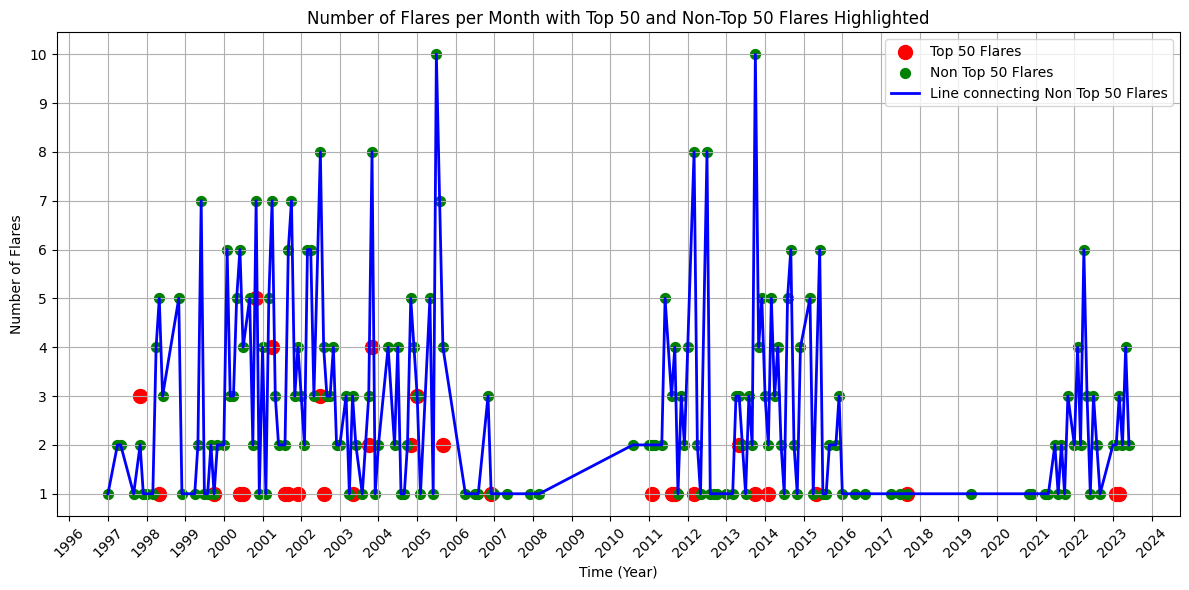

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# 1. Daten vorbereiten
df_nasa['start_datetime'] = pd.to_datetime(df_nasa['start_datetime'])
df_nasa['year_month'] = df_nasa['start_datetime'].dt.to_period('M')
monthly_flares = df_nasa.groupby('year_month').size()

df_top_50['start_datetime'] = pd.to_datetime(df_top_50['start_datetime'])
df_top_50['year_month'] = df_top_50['start_datetime'].dt.to_period('M')
monthly_top_50_flares = df_top_50.groupby('year_month').size()

# Erstellen des DataFrames für Flares, die nicht in den Top 50 sind
df_non_top_50 = df_nasa[~df_nasa['start_datetime'].isin(df_top_50['start_datetime'])]
monthly_non_top_50_flares = df_non_top_50.groupby('year_month').size()


# 3. Visualisierung erstellen
plt.figure(figsize=(12, 6))

# Grüne Punkte für alle Flares außer den Top 50
dates_non_top_50 = [date.to_timestamp() for date in monthly_non_top_50_flares.index]
print (dates_non_top_50)
counts_non_top_50 = monthly_non_top_50_flares.values
print (counts_non_top_50)
# Rote Punkte für die Top 50 Flares
for date, count in monthly_top_50_flares.items():
    plt.scatter(date.to_timestamp(), count, color='red', s=100, label='Top 50 Flares' if date == monthly_top_50_flares.index[0] else "")

# Grüne Punkte für alle Flares außer den Top 50
for date, count in monthly_non_top_50_flares.items():
    plt.scatter(date.to_timestamp(), count, color='green', s=50, label='Non Top 50 Flares' if date == monthly_non_top_50_flares.index[0] else "")

# Blaue Linie für die Gesamtanzahl der Flares pro Monat
plt.plot(dates_non_top_50, counts_non_top_50, color='blue', lw=2, label='Line connecting Non Top 50 Flares')

# Achsen und Titel hinzufügen
plt.xlabel('Time (Year)')
plt.ylabel('Number of Flares')
plt.title('Number of Flares per Month with Top 50 and Non-Top 50 Flares Highlighted')
plt.legend()

# X-Achse auf Jahresmarkierungen setzen
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Detaillierte Y-Achse einstellen
plt.gca().yaxis.set_major_locator(MultipleLocator(1))  # z. B. alle 5 Flares eine Markierung
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))  # kleinere Markierungen alle 1 Flare

plt.grid(True)
# Diagramm anzeigen
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#blaue line weg gitter eingugen


grüne punkte sind normale Flares 
Rote punkte sind top 50 Flare
Z.B zwischen 2007 bis 2008 sind 3 Flares passiert die mit grüne punkte zusehen sind
blaue linie verbindet grüne puntke miteinandere
Grafik ist mit 3er Möglichkeit gezeichnet würde